In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Imports

In [94]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

I choose to import the CO2 Emissions per capita to analyze per top 10 countries found in: https://data.world/makeovermonday/2019w22

The updated dataset was downloaded from https://data.worldbank.org/indicator/EN.ATM.CO2E.PC?end=2014&locations=AU-BE-CA-CN-DK-DE-IN-MX-US&start=1960&view=chart to include the years up to 2016, as I noticed the graph only shows the data up to 2010

In [95]:
filename = '/content/drive/MyDrive/Colab Notebooks/class_data_science/PandasForDataManipulation/co2data.csv'
df = pd.read_csv(filename, skiprows=4)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.620372,208.822811,226.118079,214.800370,207.615777,185.203957,172.119951,210.779072,194.887490,253.579113,281.995733,243.870306,234.886547,258.819846,233.488931,168.729034,360.853233,189.163403,161.803637,170.083261,174.697501,165.104909,182.259076,92.380975,228.355895,266.475106,2.868319,7.235198,10.026179,10.634733,7.847447,8.228080,7.899890,8.952044,8.605737,8.810953,8.726755,8.883091,9.243443,9.105185,26.194875,25.934024,25.671162,26.420452,26.517293,27.200708,26.947726,27.895023,26.229553,25.915322,24.670529,24.507516,13.157722,8.353561,8.410064,8.610374,8.426911,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,0.107399,0.123410,0.115142,0.086510,0.149651,0.165208,0.129996,0.135367,0.154503,0.167612,0.153558,0.181522,0.161894,0.167066,0.131783,0.150615,0.163104,0.201224,0.231961,0.293957,0.267772,0.269230,0.246823,0.233882,0.210643,0.183364,0.096197,0.085087,0.075806,0.068640,0.062435,0.056642,0.052763,0.040723,0.037235,0.037846,0.047377,0.051256,0.037075,0.051744,0.062428,0.083893,0.151721,0.238399,0.289988,0.406424,0.345149,0.280455,0.253728,0.262556,0.245101,NaN,NaN,NaN,NaN,NaN
2,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210531,0.202737,0.213560,0.205891,0.268941,0.172102,0.289718,0.480234,0.608224,0.564548,0.721246,0.751240,0.720776,0.628569,0.451354,0.469221,0.694737,0.683063,0.640966,0.611135,0.519355,0.551349,0.520983,0.471903,0.451619,0.544085,0.463508,0.437295,0.431744,0.415531,0.410523,0.441721,0.288119,0.787033,0.726233,0.496361,0.475815,0.577083,0.581961,0.574316,0.722959,0.500225,1.001878,0.985736,1.105019,1.203134,1.185000,1.234425,1.244092,1.262825,1.361181,1.295075,1.664741,1.240245,1.202861,NaN,NaN,NaN,NaN,NaN
3,Albania,ALB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1.258195,1.374186,1.439956,1.181681,1.111742,1.166099,1.333055,1.363746,1.519551,1.558968,1.753240,1.989498,2.515914,2.303897,1.849007,1.910634,2.013585,2.275876,2.530625,2.898209,1.935058,2.693024,2.624857,2.683240,2.694291,2.658015,2.665356,2.414061,2.331599,2.783243,1.678107,1.312213,0.774725,0.723790,0.600204,0.654537,0.636625,0.490365,0.560271,0.960164,0.978175,1.053304,1.229541,1.412697,1.376213,1.412498,1.302576,1.322335,1.484311,1.495600,1.578574,1.803715,1.697966,1.697279,1.900070,1.602648,1.577163,NaN,NaN,NaN,NaN,NaN
4,Andorra,AND,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.467336,7.182457,6.912053,6.736055,6.494200,6.662052,7.065071,7.239713,7.660784,7.975454,8.019284,7.786950,7.590615,7.315761,7.358625,7.299872,6.746052,6.519387,6.427810,6.121580,6.122595,5.867410,5.916884,5.901775,5.832906,5.969786,6.072370,NaN,NaN,NaN,NaN,NaN


In [96]:
#Drop the unrelated columns columns to our research
df.drop(columns= ['Country Code', 'Indicator Name', 'Indicator Code', '2017', '2018', '2019', '2020', 'Unnamed: 65'], inplace=True)

In [97]:
#melt the years in the dataframe 
df = pd.melt(df, id_vars=['Country Name'], var_name='Year', value_name='MTPC')
df.head(10)

,Country Name,Year,MTPC
0,Aruba,1960,204.620372
1,Afghanistan,1960,0.046057
2,Angola,1960,0.100835
3,Albania,1960,1.258195
4,Andorra,1960,NaN
5,Arab World,1960,0.607448
6,United Arab Emirates,1960,0.119035
7,Argentina,1960,2.383343
8,Armenia,1960,NaN
9,American Samoa,1960,NaN


In [98]:
# I am interested to see the top 10 countries over the collected data.
top10 = df.groupby(['Country Name'])[['MTPC']].sum().sort_values(by='MTPC', ascending=False).head(10)
top10

,MTPC
Country Name,
Aruba,5969.644256
Qatar,3056.213904
United Arab Emirates,1767.861390
Luxembourg,1553.836333
Kuwait,1520.211135
Brunei Darussalam,1192.038338
Bahrain,1165.972620
United States,1083.688038
North America,1065.783058


I am interested to see the difference between the original plot where 9 chosen countries were picked to visualize, and the actual top 10 counties since 1960.

I decided to subplot and visually compare.

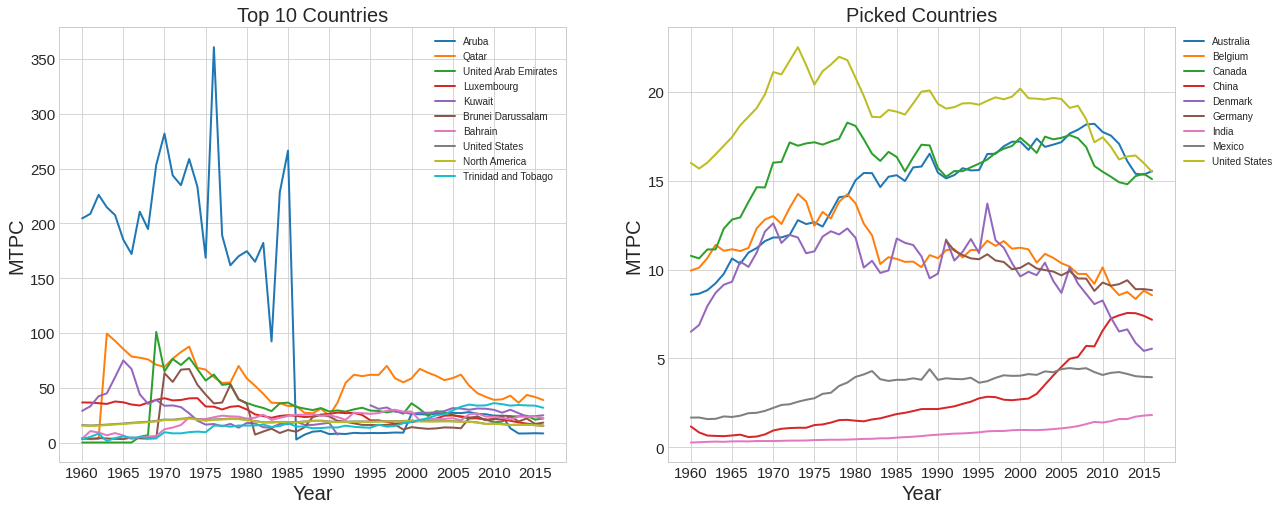

In [99]:
top10countries = np.array(top10.index)
picked_countries = ['Australia', 'Belgium', 'Canada', 'China', 'Denmark', 'Germany', 'India', 'Mexico', 'United States']
plt.style.use('seaborn-whitegrid');
plt.figure(figsize = (20, 8));
# Subplot 1 
plt.subplot(1, 2, 1);
plt.title('Top 10 Countries', fontsize=20)
for i in range(len(top10countries)):
  plt.plot(df.loc[df['Country Name']==top10countries[i], 'Year'], df.loc[df['Country Name']==top10countries[i], 'MTPC'], label=top10countries[i], linewidth=2);  
  plt.xticks(np.arange(0, len(df.loc[df['Country Name']==top10countries[i], 'Year'])+1, 5.0));
plt.xlabel('Year', fontsize=20)
plt.ylabel('MTPC', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), shadow = True);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);
# Subplot 2
plt.subplot(1, 2, 2);
plt.title('Picked Countries', fontsize=20)
for i in range(len(picked_countries)):
  plt.plot(df.loc[df['Country Name']==picked_countries[i], 'Year'], df.loc[df['Country Name']==picked_countries[i], 'MTPC'], label=picked_countries[i], linewidth=2);  
  plt.xticks(np.arange(0, len(df.loc[df['Country Name']==picked_countries[i], 'Year'])+1, 5.0));
plt.xlabel('Year', fontsize=20)
plt.ylabel('MTPC', fontsize=20)
plt.legend(bbox_to_anchor=(1, 1), shadow = True);
plt.xticks(fontsize = 15);
plt.yticks(fontsize = 15);